# Part I - Loan dataset exploration
## by Okoneyo Etieneobong

## Introduction
Prosper is America’s first marketplace lending platform, with over 10 billion dollars in funded loans.<br>
Prosper allows people to invest in each other in a way that is financially and socially rewarding. On Prosper, borrowers list loan requests between 2000 dollars and 35000 dollars and individual investors invest as little as 25 dollarsin each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors. You can learn more about Prosper <a href = "https://www.prosper.com/plp/how-it-works">here</a><br>
This data was culled from the prosper archive into a csv file that can be found <a href = "https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv">here</a>. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.A variable dictionary concisely explaining the data can be found <a href ="https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing" >in this link</a><br>
I will clean the data, provide insights and produce visualizations from it.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# loading the dataset into a data frame
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#view the first 5 rows
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

First the data will be subseted to only include fatures of interest

In [5]:
# subsetting the data to select features of interest
features = ['ListingKey','ListingCreationDate','EmploymentStatus','EmploymentStatusDuration','Occupation',
           'ProsperScore','BorrowerRate','IncomeRange','Term','DebtToIncomeRatio','MonthlyLoanPayment',
            'StatedMonthlyIncome','LoanOriginalAmount','BorrowerState',
            'ListingCategory (numeric)','LoanStatus']
loan = loan[features]

In [6]:
# view the data frame
loan.head()

ListingKey            ListingCreationDate EmploymentStatus  \
0  1021339766868145413AB3B  2007-08-26 19:09:29.263000000    Self-employed   
1  10273602499503308B223C1  2014-02-27 08:28:07.900000000         Employed   
2  0EE9337825851032864889A  2007-01-05 15:00:47.090000000    Not available   
3  0EF5356002482715299901A  2012-10-22 11:02:35.010000000         Employed   
4  0F023589499656230C5E3E2  2013-09-14 18:38:39.097000000         Employed   

   EmploymentStatusDuration     Occupation  ProsperScore  BorrowerRate  \
0                       2.0          Other           NaN        0.1580   
1                      44.0   Professional           7.0        0.0920   
2                       NaN          Other           NaN        0.2750   
3                     113.0  Skilled Labor           9.0        0.0974   
4                      44.0      Executive           4.0        0.2085   

      IncomeRange  Term  DebtToIncomeRatio  MonthlyLoanPayment  \
0  $25,000-49,999    36               0.17              330.43   
1  $50,000-74,999    36               0.18              318.93   
2   Not displayed    36               0.06              123.32   
3  $25,000-49,999    36               0.15              321.45   
4       $100,000+    36               0.26              563.97   

   StatedMonthlyIncome  LoanOriginalAmount BorrowerState  \
0          3083.333333                9425            CO   
1          6125.000000               10000            CO   
2          2083.333333                3001            GA   
3          2875.000000               10000            GA   
4          9583.333333               15000            MN   

   ListingCategory (numeric) LoanStatus  
0                          0  Completed  
1                          2    Current  
2                          0  Completed  
3                         16    Current  
4                          2    Current

## Assessing and cleaning

In [7]:
loan.loc[:,'ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])
loan.loc[:,'ListingCreationYear'] = loan.loc[:,'ListingCreationDate'].dt.year

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 113937 non-null  object        
 1   ListingCreationDate        113937 non-null  datetime64[ns]
 2   EmploymentStatus           111682 non-null  object        
 3   EmploymentStatusDuration   106312 non-null  float64       
 4   Occupation                 110349 non-null  object        
 5   ProsperScore               84853 non-null   float64       
 6   BorrowerRate               113937 non-null  float64       
 7   IncomeRange                113937 non-null  object        
 8   Term                       113937 non-null  int64         
 9   DebtToIncomeRatio          105383 non-null  float64       
 10  MonthlyLoanPayment         113937 non-null  float64       
 11  StatedMonthlyIncome        113937 non-null  float64 

In [9]:
loan.ListingCreationYear.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationYear, dtype: int64

We can see that the year 2005 has very few listings well drop rows with the year 2005

In [10]:
# function created to drop rows and columns
def drop_row_col(dframe, row_col, axis=1):
    dframe.drop(row_col, axis=axis,inplace = True)

In [11]:
yr_idx = loan.query('ListingCreationYear == 2005').index

In [12]:
drop_row_col(loan,yr_idx, axis=0)

The rows have been succesfully dropped, next the listing categories will be mapped to their appopriate format for clarity and understanding with a dictionary

In [13]:
loan.loc[:,'ListingCategory'] = loan['ListingCategory (numeric)']

In [14]:
categories = {0: 'Not Available', 1: 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business',
           4: 'Personal Loan',5:'Student Use',6: 'Auto', 7 : 'Other', 8:'Baby&Adoption', 9:'Boat', 
           10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
           14 : 'Large Purchases', 15: 'Medical/Dental', 16 : 'Motorcycle', 17 :'RV', 18 : 'Taxes',
           19: 'Vacation', 20 :'Wedding Loans'}

In [15]:
loan.loc[:,'ListingCategory'] = loan['ListingCategory'].replace(categories)

In [16]:
loan['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16942
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

This has been succesfully mapped and replaced. we'll proceed to drop the extra columns

In [17]:
columns =  ['ListingCreationDate','ListingCategory (numeric)']
drop_row_col(loan,columns,axis = 1)

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113914 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113914 non-null  object 
 1   EmploymentStatus          111682 non-null  object 
 2   EmploymentStatusDuration  106312 non-null  float64
 3   Occupation                110349 non-null  object 
 4   ProsperScore              84853 non-null   float64
 5   BorrowerRate              113914 non-null  float64
 6   IncomeRange               113914 non-null  object 
 7   Term                      113914 non-null  int64  
 8   DebtToIncomeRatio         105360 non-null  float64
 9   MonthlyLoanPayment        113914 non-null  float64
 10  StatedMonthlyIncome       113914 non-null  float64
 11  LoanOriginalAmount        113914 non-null  int64  
 12  BorrowerState             108422 non-null  object 
 13  LoanStatus                113914 non-null  o

We'll proceed to ceck for duplicates and drop them (if any) in the data

In [19]:
# check for duplicates
loan.duplicated(subset=['ListingKey']).sum()

871

In [20]:
# drop duplicates
loan.drop_duplicates(subset=['ListingKey'], inplace = True)
print(loan.duplicated(subset=['ListingKey']).sum())

0


In [21]:
#check for null values
loan.isna().sum()

ListingKey                      0
EmploymentStatus             2232
EmploymentStatusDuration     7602
Occupation                   3506
ProsperScore                29061
BorrowerRate                    0
IncomeRange                     0
Term                            0
DebtToIncomeRatio            8472
MonthlyLoanPayment              0
StatedMonthlyIncome             0
LoanOriginalAmount              0
BorrowerState                5492
LoanStatus                      0
ListingCreationYear             0
ListingCategory                 0
dtype: int64

We'll proceed to drop the rows with null values

In [22]:
# drop null values
columns = ['EmploymentStatus', 'EmploymentStatusDuration', 'Occupation','ProsperScore','BorrowerState']
loan.dropna(axis = 0,subset = columns , inplace = True)

In [23]:
loan.StatedMonthlyIncome.value_counts()

4166.666667     2709
5000.000000     2558
3333.333333     2140
5833.333333     1905
5416.666667     1870
                ... 
3722.000000        1
1576.666667        1
11678.333333       1
6556.000000        1
6369.250000        1
Name: StatedMonthlyIncome, Length: 9194, dtype: int64

The values for the monthly income have too many decimal places, they will be rounded to two decimal places.

In [24]:
#round income to two decimal places
loan.StatedMonthlyIncome = loan.StatedMonthlyIncome.round(2)

There are lots of null values in the debt to income ratio column and those rows may be useful in our analysis, I'll proceed to fill the null values. To fill null values in the Debt to income ratio, I'll calculate the debt to income ratio based on the monthly loan payment and the monthly income. I understand that there are some monthly incomes with the value of 0 to eliminate division by zero $1 will be added to every monthly income for easy calculation.

In [25]:
loan.MonthlyLoanPayment.value_counts()

173.71    2422
172.76     509
0.00       484
86.85      469
174.20     459
          ... 
140.58       1
222.25       1
411.00       1
52.49        1
190.40       1
Name: MonthlyLoanPayment, Length: 15138, dtype: int64

In [26]:
# Calculate DebtToIncomeRatio adding $1 to account for $0/month incomes
loan["DebtToIncomeRatio"].fillna(loan["MonthlyLoanPayment"] / (loan["StatedMonthlyIncome"] + 1), inplace = True)

In [27]:
loan.isna().sum()

ListingKey                  0
EmploymentStatus            0
EmploymentStatusDuration    0
Occupation                  0
ProsperScore                0
BorrowerRate                0
IncomeRange                 0
Term                        0
DebtToIncomeRatio           0
MonthlyLoanPayment          0
StatedMonthlyIncome         0
LoanOriginalAmount          0
BorrowerState               0
LoanStatus                  0
ListingCreationYear         0
ListingCategory             0
dtype: int64

In [28]:
# display the statistics of the dataset
loan.describe()

EmploymentStatusDuration  ProsperScore  BorrowerRate          Term  \
count              82695.000000  82695.000000  82695.000000  82695.000000   
mean                 103.389842      5.966866      0.196528     42.492001   
std                   96.215851      2.373374      0.074919     11.667640   
min                    0.000000      1.000000      0.040000     12.000000   
25%                   31.000000      4.000000      0.135900     36.000000   
50%                   75.000000      6.000000      0.189700     36.000000   
75%                  148.000000      8.000000      0.257600     60.000000   
max                  755.000000     11.000000      0.360000     60.000000   

       DebtToIncomeRatio  MonthlyLoanPayment  StatedMonthlyIncome  \
count       82695.000000        82695.000000         8.269500e+04   
mean            1.961768          291.928297         5.964898e+03   
std            22.078775          186.752865         8.324027e+03   
min             0.000000            0.000000         0.000000e+00   
25%             0.140000          157.645000         3.500000e+03   
50%             0.210000          252.030000         5.000000e+03   
75%             0.310000          388.755000         7.166670e+03   
max          1085.670000         2251.510000         1.750003e+06   

       LoanOriginalAmount  ListingCreationYear  
count        82695.000000         82695.000000  
mean          9080.956757          2012.301905  
std           6292.000411             1.202433  
min           1000.000000          2009.000000  
25%           4000.000000          2012.000000  
50%           7500.000000          2013.000000  
75%          13500.000000          2013.000000  
max          35000.000000          2014.000000

Looking at the statistics it can be observed that prosper score is a numerical variable, where it should be a categorical variable and has a max of 11. in the data dictionary, the prosperscore should have a max of 10. I'll proceed to drop the rows with a prosper score of 11

In [29]:
loan.ProsperScore.value_counts()

4.0     12116
6.0     12016
8.0     11846
7.0     10347
5.0      9605
3.0      7365
9.0      6826
2.0      5567
10.0     4652
11.0     1411
1.0       944
Name: ProsperScore, dtype: int64

In [30]:
sc_idx = loan.query('ProsperScore == 11').index

In [31]:
drop_row_col(loan,sc_idx, axis=0)

In [32]:
# converting pscores to categorical variable
scores = np.arange(1,11)
pscores = pd.api.types.CategoricalDtype(ordered=True, categories=scores)
loan['ProsperScore'] = loan['ProsperScore'].astype(pscores);

In [33]:
# convert income range into categorical types
ordinal_var = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','Not employed','$0']
ordered = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered)

In [34]:
#Adjust the datatype for all other categorical columns
loan['BorrowerState'] = loan['BorrowerState'].astype('category')
loan['LoanStatus'] = loan['LoanStatus'].astype('category')
loan['ListingCategory'] = loan['ListingCategory'].astype('category')
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype('category')

In [35]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81284 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingKey                81284 non-null  object  
 1   EmploymentStatus          81284 non-null  category
 2   EmploymentStatusDuration  81284 non-null  float64 
 3   Occupation                81284 non-null  object  
 4   ProsperScore              81284 non-null  category
 5   BorrowerRate              81284 non-null  float64 
 6   IncomeRange               81284 non-null  category
 7   Term                      81284 non-null  int64   
 8   DebtToIncomeRatio         81284 non-null  float64 
 9   MonthlyLoanPayment        81284 non-null  float64 
 10  StatedMonthlyIncome       81284 non-null  float64 
 11  LoanOriginalAmount        81284 non-null  int64   
 12  BorrowerState             81284 non-null  category
 13  LoanStatus                81284 non-null  cat

### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others). A few variables of interest has been selected


| Column | Description |
| :--- | :--- |
| ListingKey | Unique key for each listing, same value as the 'key' used in the listing object in the API.|
|EmploymentStatusDuration |The length in months of the employment status at the time the listing was created.|
|Occupation|The Occupation selected by the Borrower at the time they created the listing.|
|ProsperScore|A custom risk score built using historical Prosper data. The score ranges from 1-11, with 11 being the best, or lowest risk score.  Applicable for loans originated after July 2009.|
| LoanOriginalAmount | The origination amount of the loan.|
| Term | The length of the loan expressed in months.|
| BorrowerRate | The borrower's interest rate for this loan.|
|BorrowerState|The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.|
| EmploymentStatus | The employment status of the borrower at the time they posted the listing.|
| DebtToIncomeRatio | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).|
| IncomeRange | The income range of the borrower at the time the listing was created.|
| StatedMonthlyIncome | The monthly income the borrower stated at the time the listing was created.|
| MonthlyLoanPayment | The scheduled monthly loan payment.|
| LoanStatus | The current status of the loan:<br> [Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, *PastDue] <br> *(The PastDue status will be accompanied by a delinquency bucket)|
| ListingCategoryYear| The year the listing was created
| ListingCategory | The category of the listing that the borrower selected when posting their listing:<br>[0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans]|

### What is/are the main feature(s) of interest in your dataset?

> The Loan Status is the main feature of interest.As i expolore more into the data oter features of interest may arise.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Athough there are many features to explore, I suspect the EmploymentStatus, IncomeRange, EmploymentStatusDuration, Borrower Rate, DebtToIncomeRatio will have a large effect on the status of the loan.

## Univariate Exploration

In [36]:
# getting a copy of the datset
df_loan = loan.copy()

### Loan Status
In this step we are determined to know the distribution of loan status and also how many loans were completed or defaulted.

In [37]:
df_loan["LoanStatus"].value_counts()

Current                   53106
Completed                 19600
Chargedoff                 5334
Defaulted                  1004
Past Due (1-15 days)        792
Past Due (31-60 days)       356
Past Due (61-90 days)       310
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      198
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

First we'll combine all loans status categories with the past due status to a single category

In [38]:
# creating a dictionary
past ={'Current':'Current','Completed':'Completed','Chargedoff':'Chargedoff',
       'Defaulted':'Defaulted','FinalPaymentInProgress':'FinalPaymentInProgress',
       'Past Due (1-15 days)':'Past Due','Past Due (31-60 days)':'Past Due',
       'Past Due (61-90 days)':'Past Due','Past Due (91-120 days)':'Past Due',
       'Past Due (16-30 days)':'Past Due','Past Due (>120 days)':'Past Due'}
df_loan['LoanStatus'] = df_loan['LoanStatus'].map(past)
df_loan['LoanStatus'].value_counts()

Current                   53106
Completed                 19600
Chargedoff                 5334
Past Due                   2042
Defaulted                  1004
FinalPaymentInProgress      198
Name: LoanStatus, dtype: int64

In [39]:
base_color = sb.color_palette()[0]

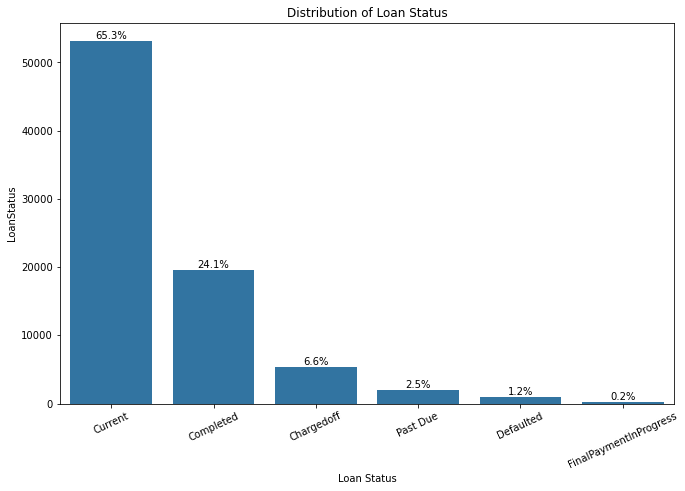

In [40]:
l_count = df_loan['LoanStatus'].value_counts() # counts of each loan status
s_order = df_loan['LoanStatus'].value_counts().index # getting the indexes to use for ordering
n_loan = df_loan.shape[0] # number of entries
plt.figure(figsize=[11,7])
sb.barplot(x = s_order.values, y = l_count, color = base_color,order = s_order);
plt.xticks(rotation=25)
plt.xlabel('Loan Status')
plt.title('Distribution of Loan Status');
for i in range(l_count.shape[0]):
    s_count = l_count[i]
    # convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*s_count/n_loan)
    # print the string value on the bar
    plt.text(i,s_count+i, pct_string, ha = 'center',va = 'bottom')

A majority of the loans are either current,completed or charged off.
Although there are a number of defaulted or past due loans, from this we may say that generally, people pay up their loans.<br>
66.2% of the loans are currrent, 23.5% completed , 6.4% charged off, 2.5% past due loans and 1.2% loans defaulted.

### Which year has the highest amount of loans?

In [41]:
df_loan.ListingCreationYear.value_counts()

2013    33148
2012    19552
2011    11442
2014     9441
2010     5523
2009     2178
Name: ListingCreationYear, dtype: int64

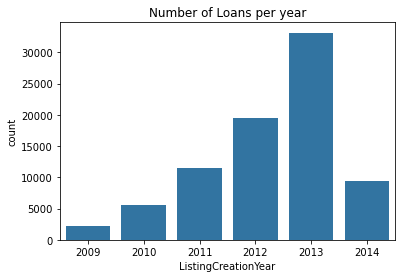

In [42]:
sb.countplot(data = df_loan, x = 'ListingCreationYear', color = base_color);
plt.title('Number of Loans per year');

From the visualization, it can be clearly seen that 2013 has the highest number of loans per year

### Employment status
Are more borrowers are employed?

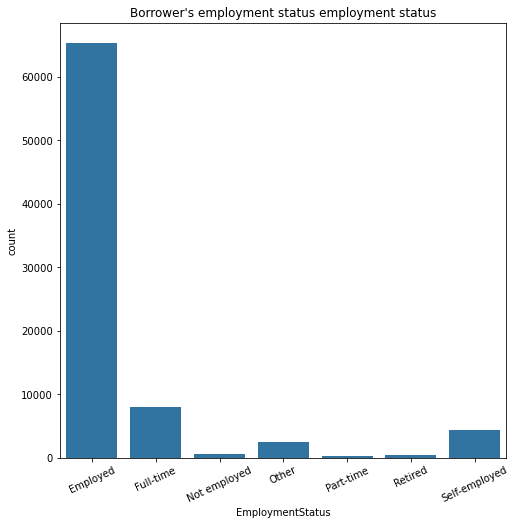

In [43]:
plt.figure(figsize=(8,8))
sb.countplot(x='EmploymentStatus',data=df_loan,color=base_color)
plt.xticks(rotation=25)
plt.title("Borrower's employment status employment status");

From the visualization, we can see that most of the borrowers are employed and very few are unemployed or retired. This is due to the fact that the prosper will rather offer service to an employed person for security of the loan.<br>
After checking the employment status we'll proceed to see which occupation borrow money more

### Occupation
Which occupation borrows money more?

In [44]:
#check the count of each category
df_loan['Occupation'].value_counts()

Other                          20841
Professional                   10224
Executive                       3307
Computer Programmer             3088
Teacher                         2816
                               ...  
Judge                             21
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 67, dtype: int64

In [45]:
#check for the unique value counts
df_loan['Occupation'].value_counts().index

Index(['Other', 'Professional', 'Executive', 'Computer Programmer', 'Teacher',
       'Administrative Assistant', 'Analyst', 'Accountant/CPA',
       'Sales - Commission', 'Skilled Labor', 'Nurse (RN)', 'Clerical',
       'Sales - Retail', 'Retail Management', 'Truck Driver', 'Construction',
       'Police Officer/Correction Officer', 'Laborer', 'Engineer - Mechanical',
       'Civil Service', 'Food Service Management', 'Medical Technician',
       'Engineer - Electrical', 'Food Service', 'Attorney',
       'Military Enlisted', 'Tradesman - Mechanic', 'Social Worker',
       'Postal Service', 'Professor', 'Nurse (LPN)', 'Nurse's Aide',
       'Tradesman - Electrician', 'Doctor', 'Fireman', 'Waiter/Waitress',
       'Scientist', 'Principal', 'Bus Driver', 'Realtor', 'Military Officer',
       'Pharmacist', 'Teacher's Aide', 'Investor', 'Landscaping',
       'Engineer - Chemical', 'Clergy', 'Pilot - Private/Commercial',
       'Architect', 'Car Dealer', 'Psychologist',
       'Student - 

In [46]:
#aggreggate similar entries
df_loan.loc[df_loan['Occupation'].str.contains('Student'), 'Occupation'] = 'Student'

df_loan.loc[df_loan['Occupation'].str.contains('Tradesman'), 'Occupation'] = 'Tradesman'

df_loan.loc[df_loan['Occupation'].str.contains('Engineer'), 'Occupation'] = 'Engineer'

df_loan.loc[df_loan['Occupation'].str.contains('Nurse'), 'Occupation'] = 'Nurse'

df_loan.loc[df_loan['Occupation'].str.contains('Sales'), 'Occupation'] = 'Sales'

In [47]:
df_loan.Occupation.value_counts()

Other                                20841
Professional                         10224
Sales                                 4258
Executive                             3307
Computer Programmer                   3088
Nurse                                 2893
Teacher                               2816
Administrative Assistant              2675
Analyst                               2638
Accountant/CPA                        2498
Skilled Labor                         2137
Engineer                              2135
Clerical                              2077
Retail Management                     1956
Truck Driver                          1342
Tradesman                             1306
Construction                          1302
Police Officer/Correction Officer     1245
Laborer                               1194
Civil Service                         1104
Food Service Management                984
Medical Technician                     869
Food Service                           824
Attorney   

Since the occupatipn categories are much well plot for the top 10 and last 10 occupations

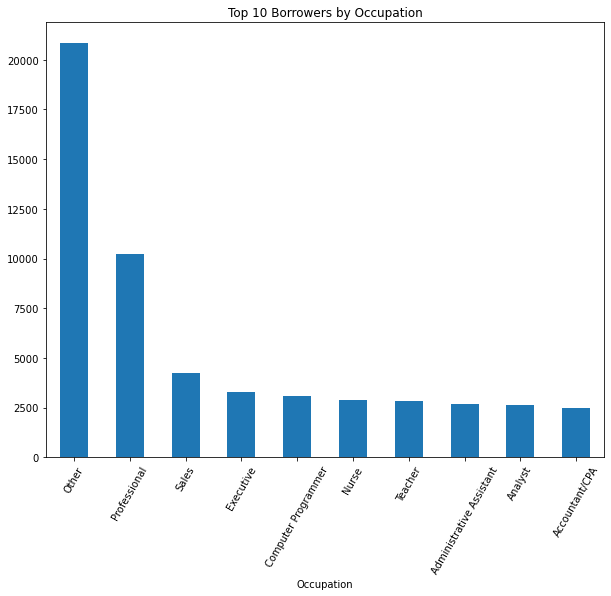

In [48]:
#plotting the bar chart
plt.figure(figsize = (10,8))
df_loan['Occupation'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar')
plt.xticks(rotation = 60)
plt.xlabel('Occupation')
plt.title('Top 10 Borrowers by Occupation');

From the graph above, it can be seen that Profesionals, Sales persons and excecutives borrow money more. This can be due to the fact that these occupations need money for investments and businesses.

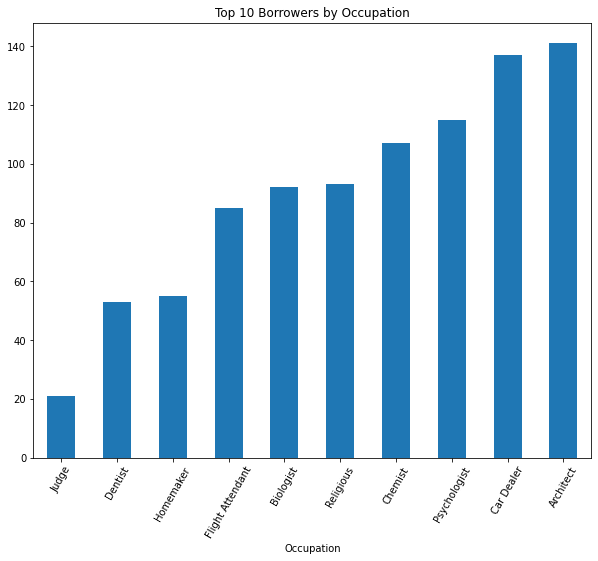

In [49]:
#plotting the bar chart
plt.figure(figsize = (10,8))
df_loan['Occupation'].value_counts().sort_values(ascending=True)[0:10].plot(kind ='bar')
plt.xlabel('Occupation')
plt.xticks(rotation = 60)
plt.title('Top 10 Borrowers by Occupation');

From this graph, It can be seen that the lowest borrowers are Judges, Dentist and Home makers. This can be due to the fact that some of them are high income earners and have less needs for investments like the Home makers.

### Prosper Score
Frequency of various prosper scores

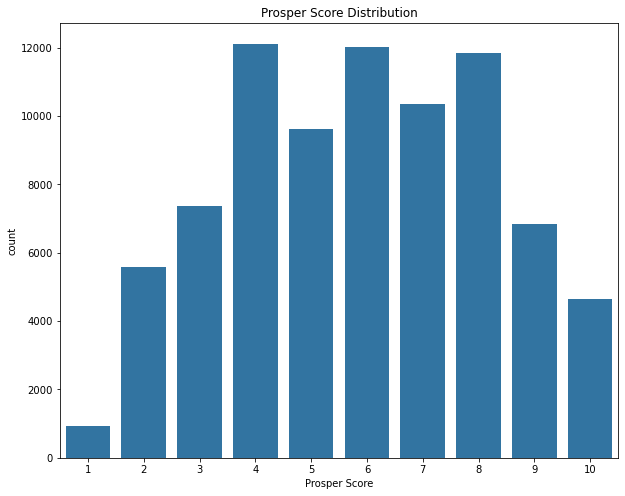

In [50]:
#Prosper Score Distribution (range form 1 to 10)
plt.figure(figsize = (10,8))
sb.countplot(data=df_loan, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

This distribution tends to be tri modal with three prosper scores being the highest (4, 6 and 8).This is expected as there are few customers that have low risk(a prosper score of 10).More of loan users are centered around an average risk

### Income Range
Distribution of income range accross lenders

In [51]:
df_loan['IncomeRange'].value_counts()

$50,000-74,999    24654
$25,000-49,999    23220
$100,000+         14385
$75,000-99,999    13969
$1-24,999          4362
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

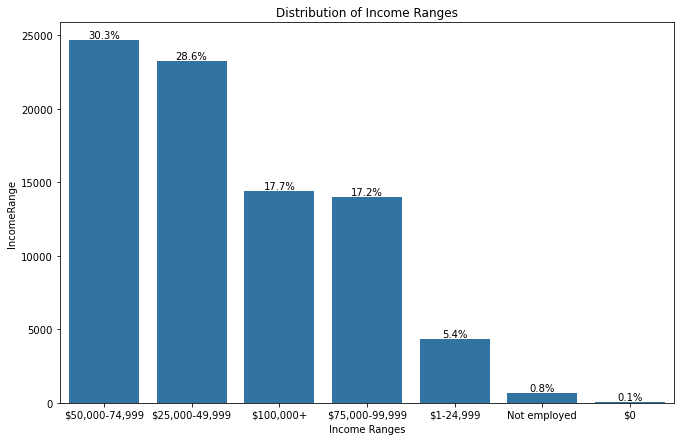

In [52]:
i_count = df_loan['IncomeRange'].value_counts() # counts of each loan status
i_order = df_loan['IncomeRange'].value_counts().index # getting the indexes to use for ordering
n_loan = df_loan.shape[0] # number of entries
plt.figure(figsize=[11,7])
sb.barplot(x = i_order.values, y = i_count, color = base_color,order = i_order);
#plt.xticks(rotation=90)
plt.xlabel('Income Ranges')
plt.title('Distribution of Income Ranges');
for i in range(i_count.shape[0]):
    s_count = i_count[i]
    # convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*s_count/n_loan)
    # print the string value on the bar
    plt.text(i,s_count+i, pct_string, ha = 'center',va = 'bottom')

From the income range plot, it can be seen that most clients have an income range of \\$25,000 and above, with the income range of \\$50,000 - \\$74,999 taking 30% and a very few who are unemployed.
This can be due to the fact that most clients are high income earners and unemployed people have a very low capability to take out loans.

### Term
Most preferable lending term for clients

In [53]:
#getting the counts for each term
df_loan['Term'].value_counts()

36    56085
60    23586
12     1613
Name: Term, dtype: int64

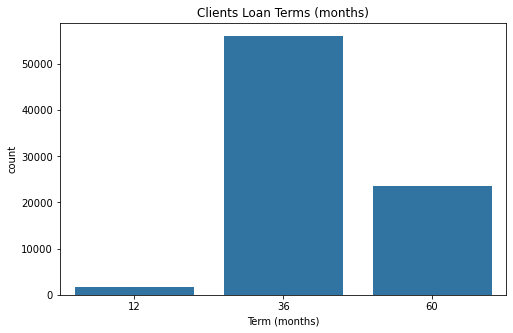

In [54]:
plt.figure(figsize=[8,5])
sb.countplot(data=df_loan, x= 'Term', color=base_color)
plt.xlabel('Term (months)')
plt.title('Clients Loan Terms (months)');

From the graph above, it can be clearly seen that most loans are taken out during the 3 year term(36 months). More insights to why this is so will be explored futher in the multivariate and bivariate sections.

### Listing Category
Why are these loans taken out?<br>What's the most common reson for taking out a loan?

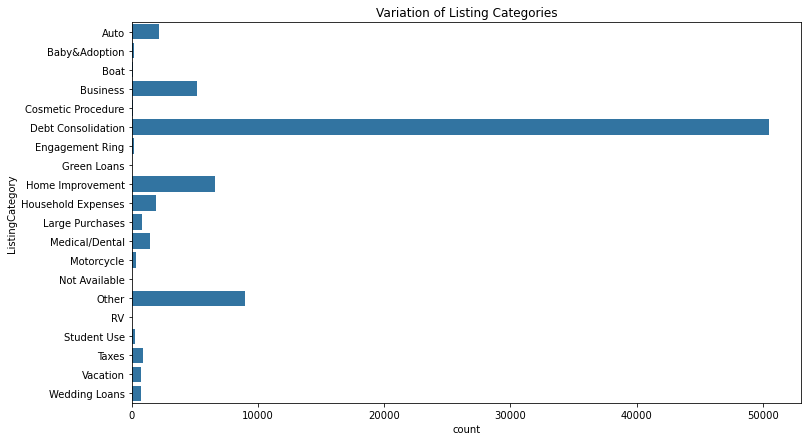

In [55]:
plt.figure(figsize=(12,7))
sb.countplot(data = df_loan, y = 'ListingCategory', color = base_color);
plt.title('Variation of Listing Categories');

The most common reason clients borrow is Debt consolidation, followed by Home improvement and other reasons.

### Borrowers Rate

In [56]:
# checking the values
df_loan['BorrowerRate']

1         0.0920
3         0.0974
4         0.2085
5         0.1314
6         0.2712
           ...  
113932    0.1864
113933    0.1110
113934    0.2150
113935    0.2605
113936    0.1039
Name: BorrowerRate, Length: 81284, dtype: float64

In [57]:
#geting the statistics of the data set
df_loan['BorrowerRate'].describe()

count    81284.000000
mean         0.198321
std          0.074218
min          0.040000
25%          0.139900
50%          0.189900
75%          0.259900
max          0.360000
Name: BorrowerRate, dtype: float64

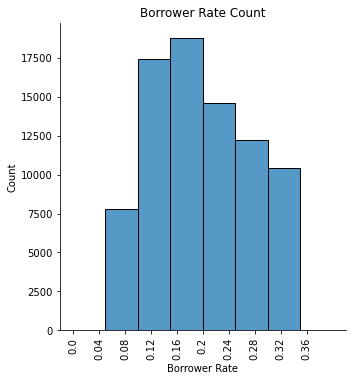

In [58]:
ticks =np.arange(0, 0.40 , 0.04)
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(0, df_loan['BorrowerRate'].max()+0.05, 0.05)
sb.displot(data = df_loan, x = 'BorrowerRate', bins = bins)
plt.xticks(ticks, labels);
plt.xticks(rotation = 90)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title("Borrower Rate Count");

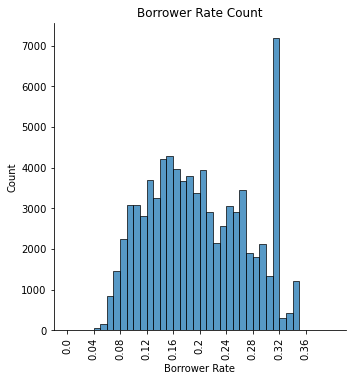

In [59]:
ticks =np.arange(0, 0.40 , 0.04)
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(0, df_loan['BorrowerRate'].max()+0.05, 0.01)
sb.displot(data = df_loan, x = 'BorrowerRate', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title("Borrower Rate Count");

Looking at the two graphs above, the first one plotting with a bin size of 0.05, the distribition is roughly bimodal and uniformly skewed with mode values of about 0.1 to 0.2. Zooming into the data set on a smaller bin size of 0.01, It is evident that the distribution is unimodal and most borrowers rate are on the 0.32 margin.

### Stated Monthly income
Which monthly income is has the most occurence?

In [60]:
df_loan['StatedMonthlyIncome'].describe()

count    8.128400e+04
mean     5.913844e+03
std      8.356605e+03
min      0.000000e+00
25%      3.458330e+03
50%      5.000000e+03
75%      7.083330e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [61]:
df_loan['StatedMonthlyIncome'].describe()

count    8.128400e+04
mean     5.913844e+03
std      8.356605e+03
min      0.000000e+00
25%      3.458330e+03
50%      5.000000e+03
75%      7.083330e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

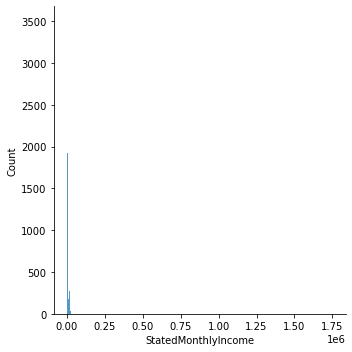

In [62]:
sb.displot(data = df_loan, x = 'StatedMonthlyIncome');

The distribution is too rightly skewed, which shows the presence of very high outliers therefore well plot it with limits on the x axis.

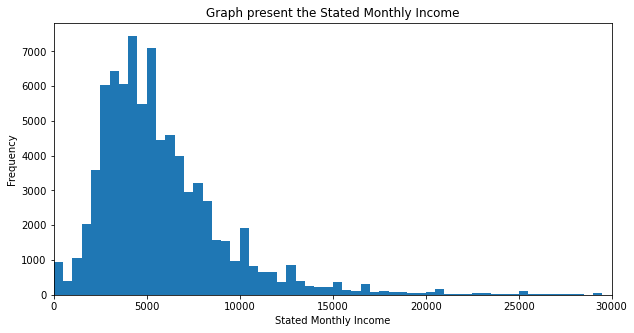

In [63]:
plt.figure(figsize=[10,5])
# making limit in x axis 
bins=np.arange(0,df_loan["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=df_loan,x="StatedMonthlyIncome",bins=bins);
plt.xlim(0,30000);

# adding labels and title
plt.xlabel("Stated Monthly Income")
plt.ylabel("Frequency")
plt.title("Graph present the Stated Monthly Income");

 As its still rightly skewed with a long tail, We'll proceed to plot on a log scale

In [64]:
np.log10(df_loan['StatedMonthlyIncome'].describe())

C:\Users\EliteBook\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    4.910005
mean     3.771870
std      3.922030
min          -inf
25%      3.538866
50%      3.698970
75%      3.850237
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

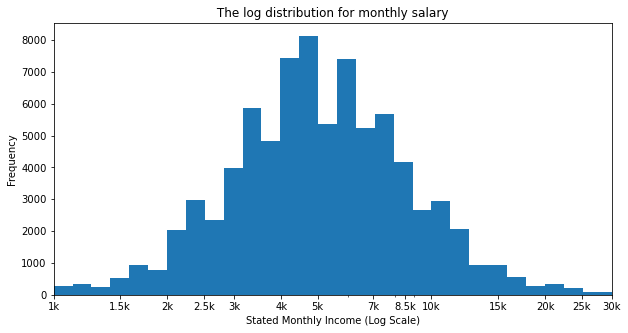

In [65]:
plt.figure(figsize=[10,5])
#implementing the log scale
bins=10**np.arange(0,6.2+1,0.05)
plt.hist(data=df_loan,x="StatedMonthlyIncome",bins=bins)
plt.xscale("log")
ticks = [1e3,15e2,2e3,25e2,3e3,4e3,5e3,7e3,85e2,10e3,15e3,20e3,25e3,30e3]
labels = ['1k','1.5k','2k','2.5k','3k','4k','5k','7k','8.5k','10k','15k','20k','25k','30k']
# making limit for the x axis to get bitter insites
plt.xlim(1e3,30e3)
plt.xticks(ticks,labels)

# lables and title for the graph
plt.xlabel("Stated Monthly Income (Log Scale)")
plt.ylabel("Frequency")
plt.title(" The log distribution for monthly salary ");

Plotting on a log scale with a smaller limit on the x axis, It can be seen that the distribution is unimodal, with most Clients on the 4000 to 5000 range of monthly income

### Debt to income Ratio
How does the debt to income ratio varies with various clients

In [66]:
df_loan['DebtToIncomeRatio'].value_counts()

0.180000    3089
0.220000    2891
0.170000    2636
0.140000    2588
0.210000    2459
            ... 
0.096536       1
0.020978       1
0.134422       1
0.118123       1
0.076087       1
Name: DebtToIncomeRatio, Length: 6411, dtype: int64

In [67]:
df_loan['DebtToIncomeRatio'].describe()

count    81284.000000
mean         1.992434
std         22.268343
min          0.000000
25%          0.140000
50%          0.210000
75%          0.310000
max       1085.670000
Name: DebtToIncomeRatio, dtype: float64

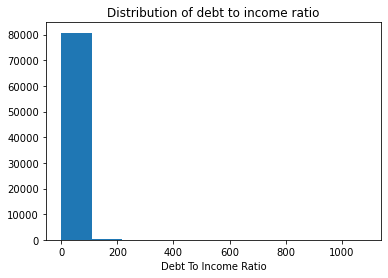

In [68]:
# Plotting histogram 
plt.hist(x='DebtToIncomeRatio',data=df_loan)
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of debt to income ratio');

There is a presence of outliers in the data well see the distribution without the outliers and a smaller bin size.

In [69]:
# filtering the data frame to remove outliers
filt = df_loan['DebtToIncomeRatio'] <= 1
dIT = df_loan.loc[filt,:]

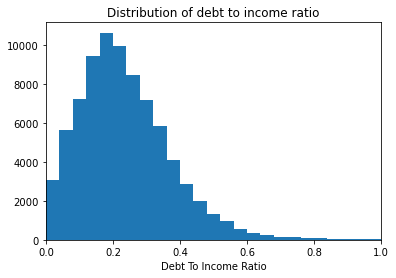

In [70]:
# Plotting histogram
bins = np.arange(0,1+0.01,0.04)
plt.hist(x='DebtToIncomeRatio',data=dIT, bins = bins)
plt.xlim(0,1)
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of debt to income ratio');

The distribution is unimodal but slightly right skewed.In which the values peaked at 0.2 debt to income ration. A good debt to income ratio should be no more than 0.3, Therefore its obvious why this data is rightly skewed as the lender lends more to people with a good debt to income ratio. <a href = 'https://bankrate.com/mortgage/ratio-debt-calculator'>Learn more about the ratio here</a>

### Borrowers state
Frequency of borrowing in each state

In [71]:
# mapping countries to their abbreviations into a dictionary
states_dict = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [72]:
abbreviations_dict = dict(map(reversed, states_dict.items()))
df_loan['US_states']= df_loan['BorrowerState'].replace(abbreviations_dict)
df_loan['US_states']

1             Colorado
3              Georgia
4            Minnesota
5           New Mexico
6               Kansas
              ...     
113932        Illinois
113933    Pennsylvania
113934           Texas
113935         Georgia
113936        New York
Name: US_states, Length: 81284, dtype: object

In [73]:
# Plotting map of US states using plotly.
fig = px.choropleth(locations=df_loan['BorrowerState'].value_counts().index, locationmode="USA-states",color= df_loan['BorrowerState'].value_counts().values,scope="usa", hover_name=df_loan['US_states'].value_counts().index,hover_data={'Borrowers':df_loan['US_states'].value_counts().values})
fig.layout.coloraxis.colorbar.title = 'Number of Clients'
fig.layout.title = 'Borrowers by States in the U.S'
fig.show()

California had the highest number of borrowers this may be due to its high population.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed log transformations in the Stated Monthly Income as the data was heavily skewed, borrowers rate and debt to income ratio had unusual points which i had to limit using xlim.
California is the highest Borrower state, that make sense because population is higher.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to change the form of loan status to allow my visualizations to be more straight foward, since the past due status can be grouped as one.<br>I also changed some of my column types to be categorical variables.<br> Most of my numerical variables were highly skewed with a large number of outliers.<br>Listing category number was changed to the actual listing category for better readability of the visualizations.<br> When plotting occupation due to the high number of features top 10 features were selected to reduce ambiguity.<br>Borrowers state had to be mapped into another column which i called US states as abbreviations needed to be removed for my map plot to be understood.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Looking for correlations in the data set

In [74]:
# getting the statistics of some features in the data
df_loan.describe().transpose()

count         mean          std      min  \
EmploymentStatusDuration  81284.0   103.284829    96.181342     0.00   
BorrowerRate              81284.0     0.198321     0.074218     0.04   
Term                      81284.0    42.487771    11.682350    12.00   
DebtToIncomeRatio         81284.0     1.992434    22.268343     0.00   
MonthlyLoanPayment        81284.0   289.619245   184.838394     0.00   
StatedMonthlyIncome       81284.0  5913.844471  8356.604944     0.00   
LoanOriginalAmount        81284.0  8980.076030  6205.927376  1000.00   
ListingCreationYear       81284.0  2012.283057     1.202498  2009.00   

                                25%        50%         75%         max  
EmploymentStatusDuration    31.0000    74.0000    148.0000      755.00  
BorrowerRate                 0.1399     0.1899      0.2599        0.36  
Term                        36.0000    36.0000     60.0000       60.00  
DebtToIncomeRatio            0.1400     0.2100      0.3100     1085.67  
MonthlyLoanPayment         157.2350   249.2850    385.7400     2251.51  
StatedMonthlyIncome       3458.3300  5000.0000   7083.3300  1750002.92  
LoanOriginalAmount        4000.0000  7500.0000  13000.0000    35000.00  
ListingCreationYear       2012.0000  2013.0000   2013.0000     2014.00

In [75]:
# arrange numerical and categorical variables
num_var = ['LoanOriginalAmount', 'BorrowerRate','EmploymentStatusDuration','DebtToIncomeRatio','StatedMonthlyIncome']
cat_var = ['Term', 'ProsperScore', 'EmploymentStatus','IncomeRange','LoanStatus']

In [76]:
# getting the correlation between the numerical variables
df_loan.corr()

EmploymentStatusDuration  BorrowerRate      Term  \
EmploymentStatusDuration                  1.000000     -0.040108  0.054603   
BorrowerRate                             -0.040108      1.000000 -0.004488   
Term                                      0.054603     -0.004488  1.000000   
DebtToIncomeRatio                        -0.049414      0.058777 -0.020163   
MonthlyLoanPayment                        0.064169     -0.327774  0.059816   
StatedMonthlyIncome                       0.051439     -0.087645  0.008719   
LoanOriginalAmount                        0.080069     -0.410893  0.347672   
ListingCreationYear                       0.094859     -0.242546  0.254750   

                          DebtToIncomeRatio  MonthlyLoanPayment  \
EmploymentStatusDuration          -0.049414            0.064169   
BorrowerRate                       0.058777           -0.327774   
Term                              -0.020163            0.059816   
DebtToIncomeRatio                  1.000000           -0.001025   
MonthlyLoanPayment                -0.001025            1.000000   
StatedMonthlyIncome               -0.056779            0.174121   
LoanOriginalAmount                -0.019381            0.914037   
ListingCreationYear               -0.042905            0.289137   

                          StatedMonthlyIncome  LoanOriginalAmount  \
EmploymentStatusDuration             0.051439            0.080069   
BorrowerRate                        -0.087645           -0.410893   
Term                                 0.008719            0.347672   
DebtToIncomeRatio                   -0.056779           -0.019381   
MonthlyLoanPayment                   0.174121            0.914037   
StatedMonthlyIncome                  1.000000            0.173182   
LoanOriginalAmount                   0.173182            1.000000   
ListingCreationYear                  0.037402            0.345947   

                          ListingCreationYear  
EmploymentStatusDuration             0.094859  
BorrowerRate                        -0.242546  
Term                                 0.254750  
DebtToIncomeRatio                   -0.042905  
MonthlyLoanPayment                   0.289137  
StatedMonthlyIncome                  0.037402  
LoanOriginalAmount                   0.345947  
ListingCreationYear                  1.000000

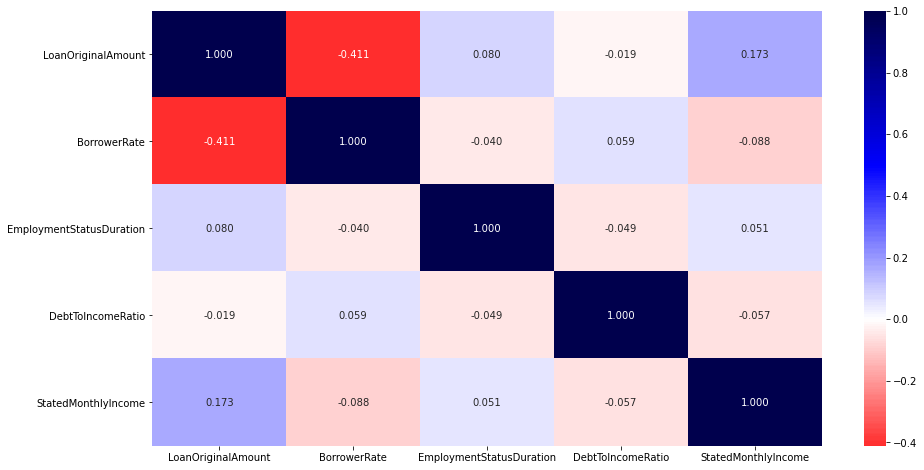

In [77]:
#create heatmap
plt.figure(figsize = [15, 8])
sb.heatmap(df_loan[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'seismic_r', center = 0);

Most of the numerical variables are negatively correlated with Loan original amount and borrowers rate being the more correlated values.

### Loan original Amount and Monthly loan payment relationship

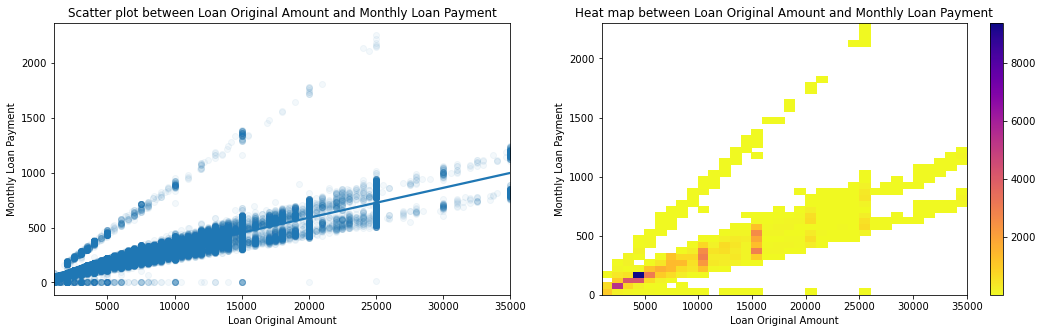

In [78]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df_loan,x="LoanOriginalAmount",y="MonthlyLoanPayment",scatter_kws={"alpha":1/20});
plt.xlabel("Loan Original Amount");
plt.ylabel("Monthly Loan Payment");
plt.title("Scatter plot between Loan Original Amount and Monthly Loan Payment");

plt.subplot(1, 2, 2)
# Specify bin edges 
x_bin = np.arange(df_loan['LoanOriginalAmount'].min(), df_loan['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(df_loan['MonthlyLoanPayment'].min(), df_loan['MonthlyLoanPayment'].max()+50, 50)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map.
plt.hist2d(data = df_loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', bins = [x_bin, y_bin], cmap = 'plasma_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Monthly Loan Payment");
plt.title("Heat map between Loan Original Amount and Monthly Loan Payment");

Looking at the heatmap and scatter plot,the correlation between loan original amount and monthly loan payment is strongly positive, escpecially with lower values of Loan Origial Amount and Monthly loan payments.

### Borrowers Rate and Stated Monthly income

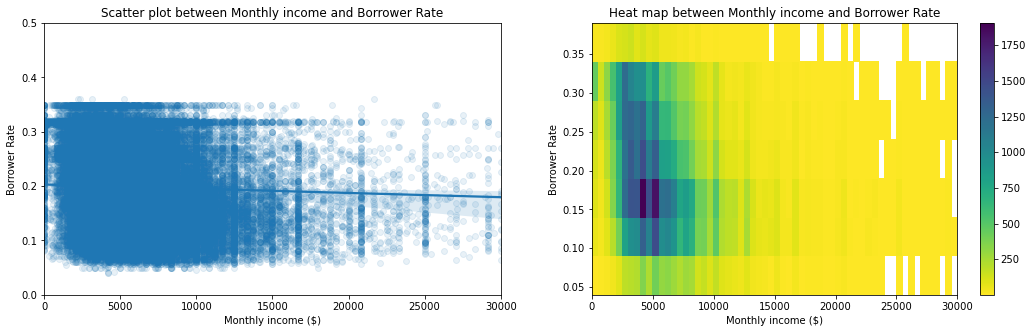

In [79]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df_loan,x="StatedMonthlyIncome",y="BorrowerRate",x_jitter=0.3,scatter_kws={"alpha":1/10});
plt.xlim(0,30000)
plt.ylim(0,0.5)
plt.xlabel("Monthly income ($)");
plt.ylabel("Borrower Rate");
plt.title("Scatter plot between Monthly income and Borrower Rate");

plt.subplot(1, 2, 2)
x_bin = np.arange(df_loan['StatedMonthlyIncome'].min(), df_loan['StatedMonthlyIncome'].max()+500,500)
y_bin = np.arange(df_loan['BorrowerRate'].min(), df_loan['BorrowerRate'].max()+0.05, 0.05)
plt.hist2d(data = df_loan, x = 'StatedMonthlyIncome', y = 'BorrowerRate', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlim(0,30000)
plt.xlabel("Monthly income ($)");
plt.ylabel("Borrower Rate");
plt.title("Heat map between Monthly income and Borrower Rate");

In [80]:
df_loan['StatedMonthlyIncome'].value_counts()

4166.67    2678
5000.00    2531
3333.33    2131
5833.33    1862
5416.67    1844
           ... 
7296.42       1
5580.00       1
1017.50       1
9975.33       1
4203.33       1
Name: StatedMonthlyIncome, Length: 9103, dtype: int64

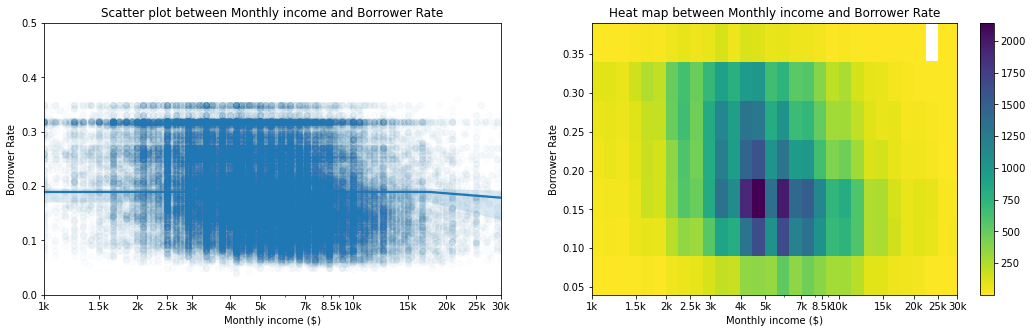

In [81]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df_loan,x="StatedMonthlyIncome",y="BorrowerRate",scatter_kws={"alpha":1/50});
plt.xlim(0,30000)
plt.ylim(0,0.5)
plt.xscale("log")
ticks = [1e3,15e2,2e3,25e2,3e3,4e3,5e3,7e3,85e2,10e3,15e3,20e3,25e3,30e3]
labels = ['1k','1.5k','2k','2.5k','3k','4k','5k','7k','8.5k','10k','15k','20k','25k','30k']
# making limit for the x axis to get better insigts
plt.xlim(1e3,30e3)
plt.xticks(ticks,labels)
plt.xlabel("Monthly income ($)");
plt.ylabel("Borrower Rate");
plt.title("Scatter plot between Monthly income and Borrower Rate");

plt.subplot(1, 2, 2)
x_bin = 10**np.arange(df_loan['StatedMonthlyIncome'].min(), np.log10(df_loan['StatedMonthlyIncome'].max())+0.05,0.05)
y_bin = np.arange(df_loan['BorrowerRate'].min(), df_loan['BorrowerRate'].max()+0.05, 0.05)
plt.hist2d(data = df_loan, x = 'StatedMonthlyIncome', y = 'BorrowerRate', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xscale("log")
ticks = [1e3,15e2,2e3,25e2,3e3,4e3,5e3,7e3,85e2,10e3,15e3,20e3,25e3,30e3]
labels = ['1k','1.5k','2k','2.5k','3k','4k','5k','7k','8.5k','10k','15k','20k','25k','30k']
# making limit for the x axis to get bitter insites
plt.xlim(1e3,30e3)
plt.xticks(ticks,labels)
plt.xlabel("Monthly income ($)");
plt.ylabel("Borrower Rate");
plt.title("Heat map between Monthly income and Borrower Rate");

From the plot above we can see that the values are more concentrated at the center, this may be due to the large number of data points there. The heat map shows that for values of monthly income of \\$2500 to \\$8500, there is a strong correlation of borrowers rate. This can be due to the fact that these sets of clients have a good prosper score well see that later

### Stated Monthly income and Loan original Amount
Does the monthly income of a person affect the amount of loan taken?

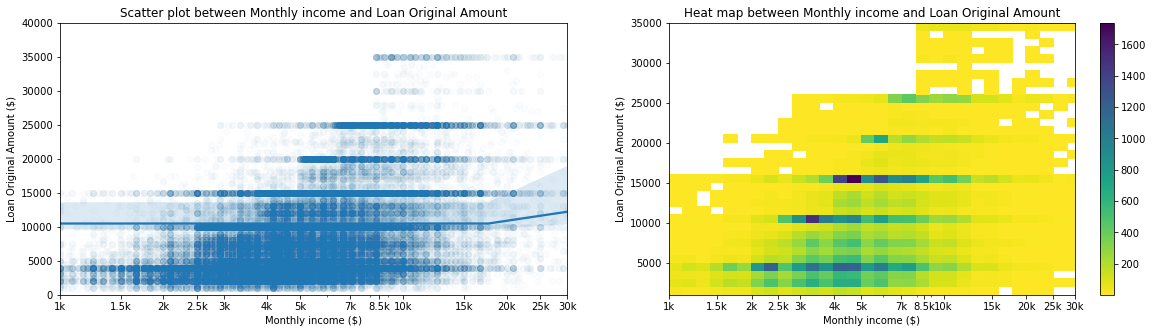

In [82]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df_loan,x="StatedMonthlyIncome",y="LoanOriginalAmount",scatter_kws={"alpha":1/50});
plt.xscale("log")
ticks = [1e3,15e2,2e3,25e2,3e3,4e3,5e3,7e3,85e2,10e3,15e3,20e3,25e3,30e3]
labels = ['1k','1.5k','2k','2.5k','3k','4k','5k','7k','8.5k','10k','15k','20k','25k','30k']
# making limit for the x axis to get better insigts
plt.xlim(1e3,30e3)
plt.ylim(0,40000)
plt.xticks(ticks,labels)
plt.xlabel("Monthly income ($)");
plt.ylabel("Loan Original Amount ($)");
plt.title("Scatter plot between Monthly income and Loan Original Amount");

plt.subplot(1, 2, 2)
x_bin = 10**np.arange(df_loan['StatedMonthlyIncome'].min(), np.log10(df_loan['StatedMonthlyIncome'].max())+0.05,0.05)
y_bin = np.arange(df_loan['LoanOriginalAmount'].min(), df_loan['LoanOriginalAmount'].max()+1000,1000)
plt.hist2d(data = df_loan, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xscale("log")
ticks = [1e3,15e2,2e3,25e2,3e3,4e3,5e3,7e3,85e2,10e3,15e3,20e3,25e3,30e3]
labels = ['1k','1.5k','2k','2.5k','3k','4k','5k','7k','8.5k','10k','15k','20k','25k','30k']
# making limit for the x axis to get bitter insites
plt.xlim(1e3,30e3)
plt.xticks(ticks,labels)
plt.xlabel("Monthly income ($)");
plt.ylabel("Loan Original Amount ($)");
plt.title("Heat map between Monthly income and Loan Original Amount");

From the look of the plot, these values are weakly correlated. Generally,the monthly income of a person does not affect the loan collected except in cases of monthly income earners of \\$4000 to \\$5000, where some monthly income earners take lones within the range of their income.

### Prosper Score and Debt to income ratio
Do low risk loans have a good debt to income ratio?

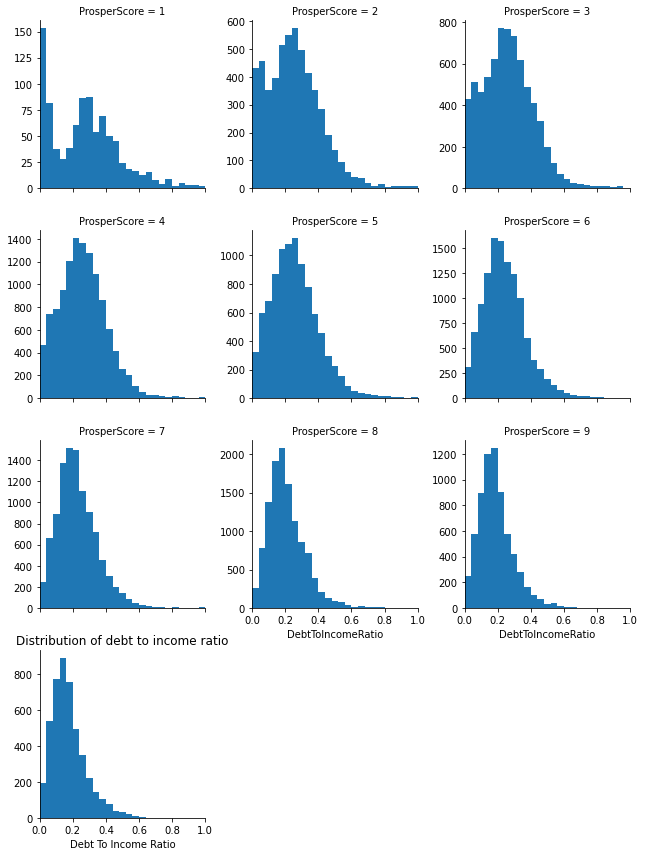

In [83]:
bins = np.arange(0,1+0.01,0.04)
g = sb.FacetGrid(data = df_loan, col = 'ProsperScore', col_wrap=3, sharey=False)
g.map(plt.hist, 'DebtToIncomeRatio',bins = bins);
plt.xlim(0,1)
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of debt to income ratio');

Generally, all prosper scores have a good debt to income ratio, but the prosper score of 1 which is high risk has debt to income ratio that are more distribuited from high to low but most of them are on the low end.

### Prosper Score and Loan Status

In [84]:
# categorise current, completed and finalpayment in progress are categorize as completed otherwise defaulted
# creating a dictionary
status ={'Current':'Completed','Completed':'Completed','Chargedoff':'Defaulted',
       'Defaulted':'Defaulted','FinalPaymentInProgress':'Completed',
       'Past Due':'Defaulted'}
df_loan['Status'] = df_loan['LoanStatus'].map(status)
df_loan['Status'].value_counts()

Completed    72904
Defaulted     8380
Name: Status, dtype: int64

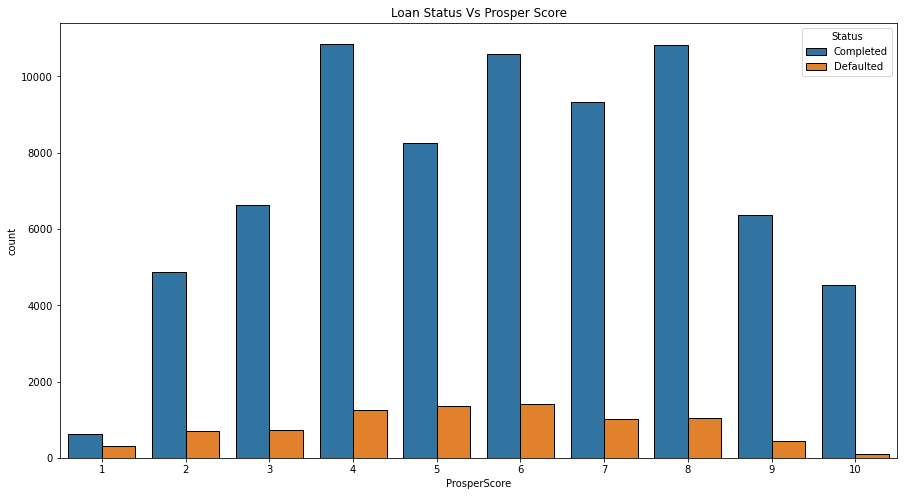

In [85]:
#plot the bar chachart
plt.figure(figsize = [15, 8]) 
sb.countplot(data = df_loan, x = 'ProsperScore', hue = 'Status', edgecolor = 'black');
plt.title('Loan Status Vs Prosper Score');

From this plot, it can be seen that prosper score of 10 has a very small number defaulted loans and loans with a prosper score of 1 has a large proportion of defaulted loans.

### Loan Status and Term
which loan term has a more completed or defaulted status

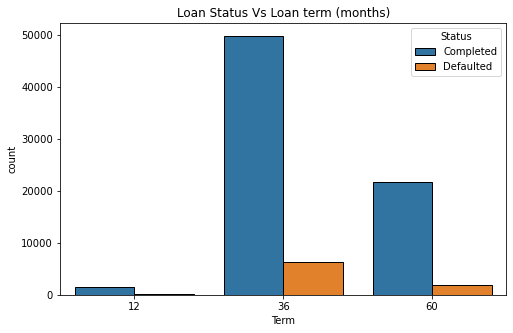

In [86]:
#plot the bar chart
plt.figure(figsize = [8, 5]) 
sb.countplot(data = df_loan, x = 'Term', hue = 'Status', edgecolor = 'black');
plt.title('Loan Status Vs Loan term (months)');

From this we can see that very few loans that were taken on a 12 month term were defaulted, this may be beacause the loan term is relatively small, therefore It's easy to pay back those loans.

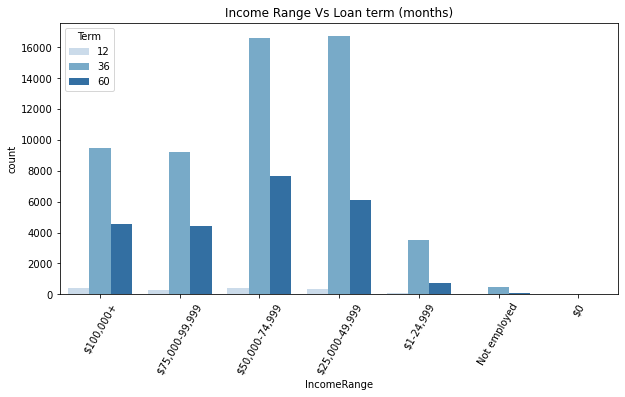

In [87]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df_loan, x = 'IncomeRange', hue = 'Term', palette = 'Blues');
plt.xticks(rotation = 60)
plt.title('Income Range Vs Loan term (months)');

For all income ranges people prefer to take loans of the 36 months period.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Term has no relationship with income range and status,I guess most people generally prefer the three year loan term, more data will be required to find why this is so.<br>There is a positive crrelation between loan original amount and monthly loan payment.<br>There is a weak correlation between loan original amount and stated monthly income.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There seem to be slight negative relationship between the Borrower rate and Loan Original Amount. The higher the interest, the smaller the Loan. This may be a marketing stategy to attract clients to collect small loans. 

## Multivariate Exploration

### Loan status for Debt To Income Ratio by Listing Creation Year


In [88]:
filt = df_loan['DebtToIncomeRatio'] <= 1
DIT = df_loan.loc[filt,:]

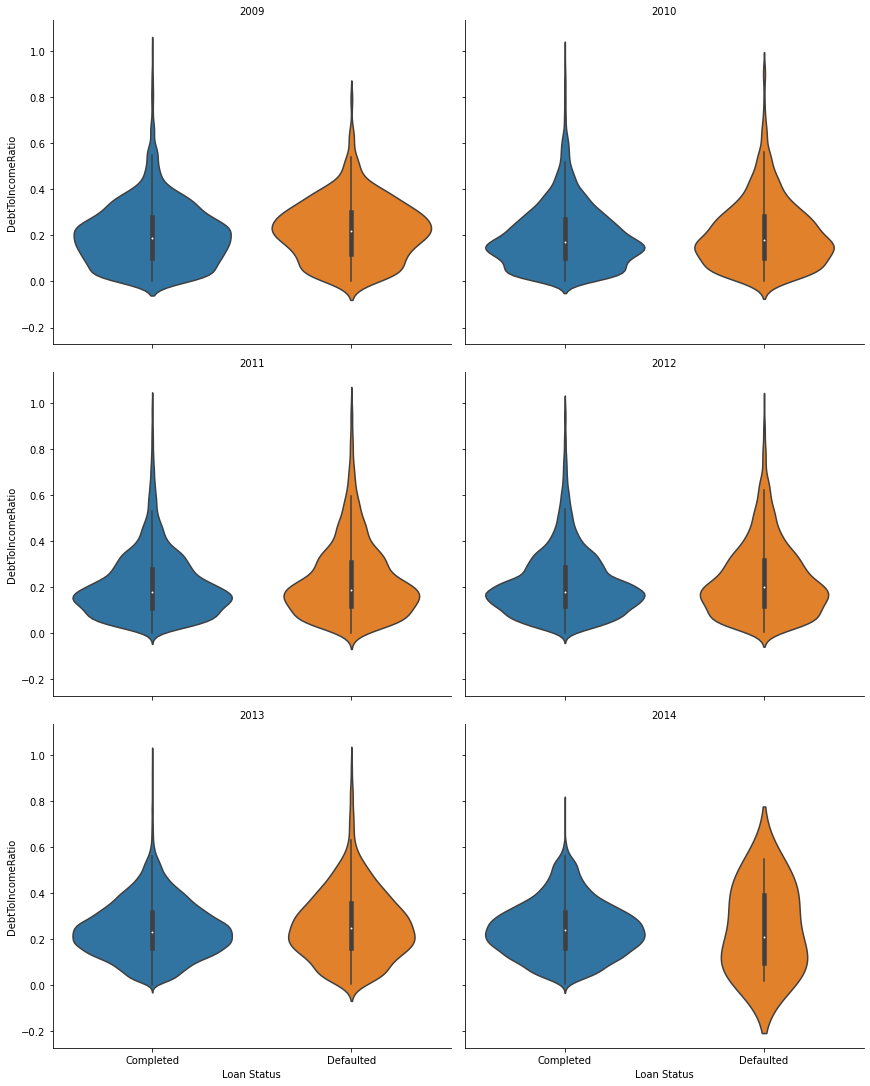

In [89]:
g = sb.catplot(x='Status',y='DebtToIncomeRatio',  col = "ListingCreationYear",data = DIT, kind = "violin",col_wrap = 2,orient = "v", aspect = 1.2);
(g.set_axis_labels("Loan Status","DebtToIncomeRatio")
 .set_titles("{col_name}"));
g.fig.set_size_inches(14,8)

It can bee seen that there are lots of outliers in the data except in the year 2014, where there are few outliers. For all the years involved, loans with the defaulted status has a larger debt to income ratio, than those of the completed status. The data has a generally uniform median of 0.2. From the distiution of points, there are fewer defaulted status in the year 2011 and 2012. There are also aunusually low values of debt to income ratio (less than zero) in the year 2014. 

### Stated Monthy income by Loan Status for all years

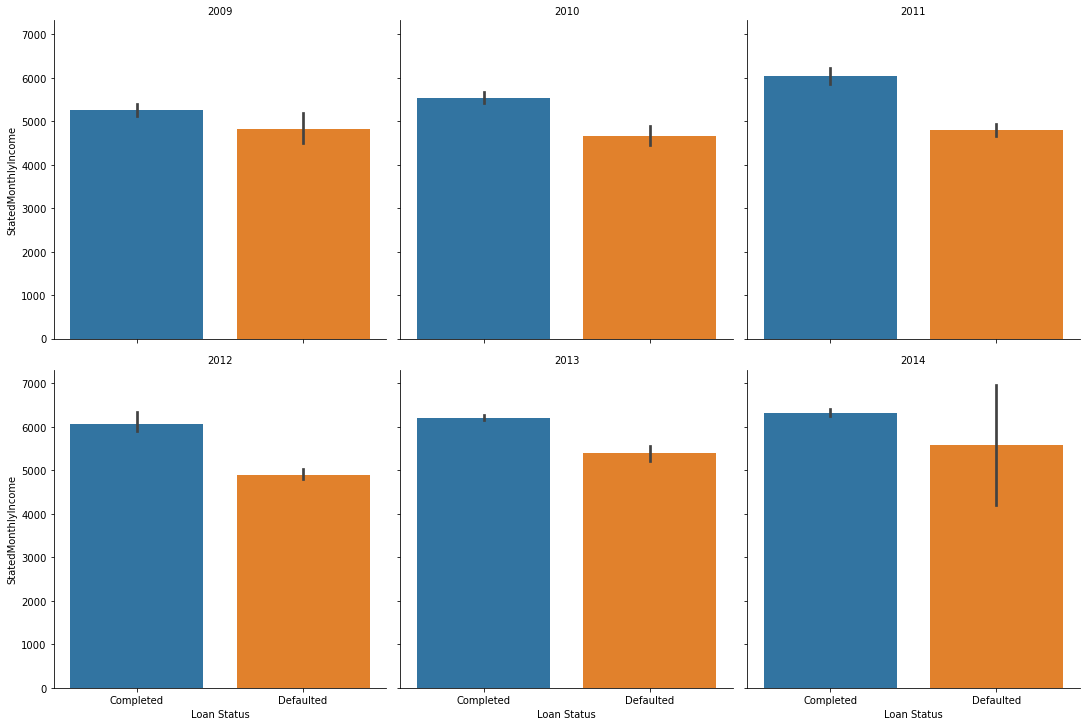

In [90]:
g = sb.catplot(x='Status',y='StatedMonthlyIncome',  col = "ListingCreationYear",data = DIT, kind = "bar",col_wrap = 3, aspect = 1);
(g.set_axis_labels("Loan Status","StatedMonthlyIncome")
 .set_titles("{col_name}"));

There are more Loans with the completed status for all years. The stated monthly income oncreases as the years increase, with 2014 having the highest for both defaulted and completed status.

### Borrowers rate for each year and defaultment status

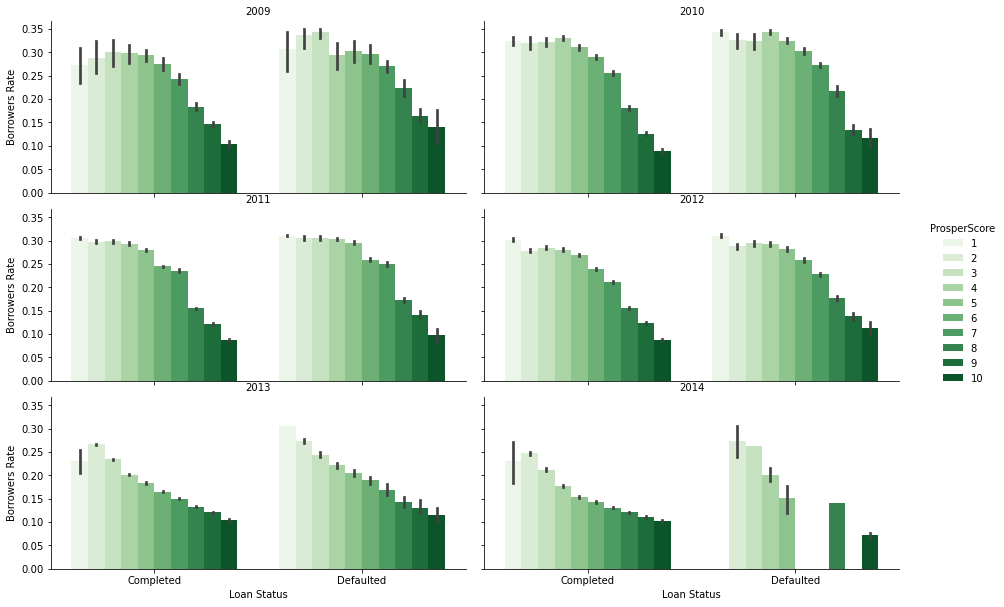

In [94]:
g = sb.catplot(x='Status',y='BorrowerRate', col = "ListingCreationYear",
               hue = "ProsperScore",data = DIT, kind = "bar",col_wrap = 2,palette ="Greens", aspect = 1);
(g.set_axis_labels("Loan Status","Borrowers Rate")
 .set_titles("{col_name}"));
g.fig.set_size_inches(14,8)
plt.tight_layout()

Borrowers rate decreases as prosper score increases in both completed and defaulted status for all years, In the year 2014, there is a large amount of defaulted status with a small prosper score and high borrowers rate. Borrowers rate is small for low risk loans and high for high risk loans, more data will be needed to find out why this is so.

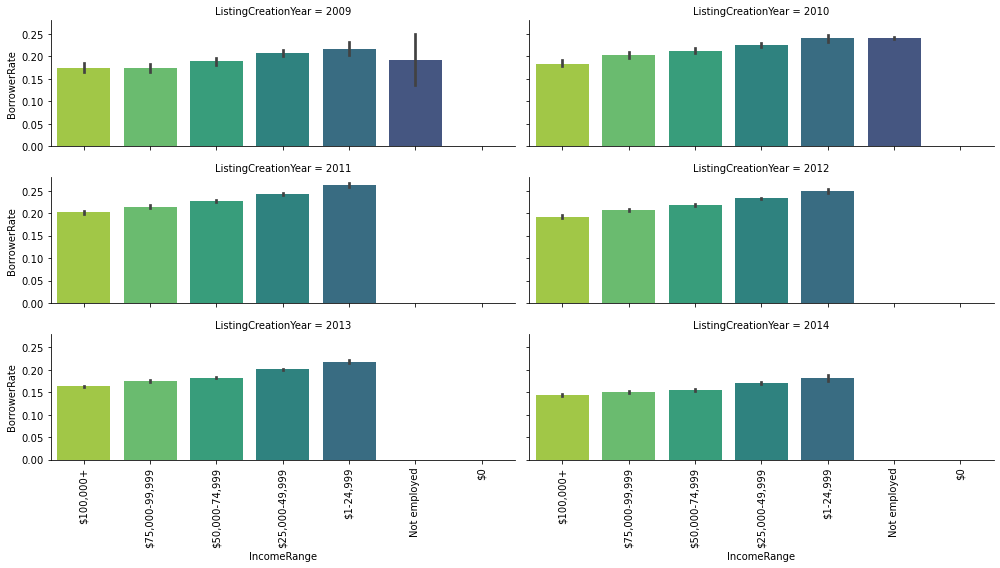

In [95]:
g = sb.catplot(x='IncomeRange',y='BorrowerRate', col = "ListingCreationYear",
               data = DIT, kind = "bar",col_wrap = 2,palette ="viridis_r", aspect = 1);
g.fig.set_size_inches(14,8)
g.set_xticklabels(rotation = 90);
plt.tight_layout()

For all years,Borrowers rate increases with decreasing income range

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part year was an important variable, I was trying the observe increase or decrease in the company policy as the years go by.Monthly income had little effect on loan status.

### Were there any interesting or surprising interactions between features?

> The higher the income, the lower the borrowers rate,The unemployed receive heigher interest rate than the high income earners. Low risk loans have a smaller interest rate and high risk has a high interest rate

## Conclusion
1. Distribution of stated montly income is skewed with a lot of outliers and very large range of values. 
2. Most loan payments are below \\$15,000, seems like most loans are increments of $5,000. California has the highest ampount of borrowers. 
3. Professionals,excecutives and sales persons have the highest number of borrowers. Most clients prefer the three year loan term.
4. Most people collect loans to settle other loans(Debt Consolidation)
5.  Monthly loan payment and loan amount are very related to each other.
6. In 2013,Prosper made the highest amount of loan sales.Loans with good interest rate are given to low income earners than high ones.

### Refererences
1.https://medium.com/analytics-vidhya/how-to-plot-a-map-in-python-d78f17c0b4a4#:~:text=1%20Using%20Geopandas%20and%20Geoplot.%20At%20my%20previous,I%20additionally%20found%20that%20I%20needed...%20More%20
2.https://stackoverflow.com/questions/58303175/plotting-three-dimensions-of-categorical-data-in-python

In [93]:
df_loan.head()

ListingKey EmploymentStatus  EmploymentStatusDuration  \
1  10273602499503308B223C1         Employed                      44.0   
3  0EF5356002482715299901A         Employed                     113.0   
4  0F023589499656230C5E3E2         Employed                      44.0   
5  0F05359734824199381F61D         Employed                      82.0   
6  0F0A3576754255009D63151         Employed                     172.0   

      Occupation ProsperScore  BorrowerRate     IncomeRange  Term  \
1   Professional            7        0.0920  $50,000-74,999    36   
3  Skilled Labor            9        0.0974  $25,000-49,999    36   
4      Executive            4        0.2085       $100,000+    36   
5   Professional           10        0.1314       $100,000+    60   
6          Sales            2        0.2712  $25,000-49,999    36   

   DebtToIncomeRatio  MonthlyLoanPayment  StatedMonthlyIncome  \
1               0.18              318.93              6125.00   
3               0.15              321.45              2875.00   
4               0.26              563.97              9583.33   
5               0.36              342.37              8333.33   
6               0.27              122.67              2083.33   

   LoanOriginalAmount BorrowerState LoanStatus  ListingCreationYear  \
1               10000            CO    Current                 2014   
3               10000            GA    Current                 2012   
4               15000            MN    Current                 2013   
5               15000            NM    Current                 2013   
6                3000            KS    Current                 2013   

      ListingCategory   US_states     Status  
1    Home Improvement    Colorado  Completed  
3          Motorcycle     Georgia  Completed  
4    Home Improvement   Minnesota  Completed  
5  Debt Consolidation  New Mexico  Completed  
6  Debt Consolidation      Kansas  Completed